In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\current_dataset.csv"

data = pd.read_csv(data_dir)


#outliers removal
cols = ['Rainfall (mm)','Mean Temp. (*C)', 'RHmean (%)', 'SShr (hrs)', 'WD (deg)', 'WS (Km/hr)']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data.info  

<bound method DataFrame.info of     Agricultural Zone   Month  Week  Rainfall (mm)  Mean Temp. (*C)  \
1               Bogra  August     1           63.3             29.3   
4               Dhaka    July     2           73.5             29.1   
5            Dinajpur    June     4           96.0             29.2   
6            Faridpur    July     4           84.5             29.0   
7              Khulna  August     3           76.5             29.1   
..                ...     ...   ...            ...              ...   
368            Khulna     May     1           17.5             30.1   
369           Jashore    June     1           49.5             30.7   
370          Faridpur   April     1           18.0             28.5   
371          Dinajpur   April     1            8.0             26.7   
372             Dhaka     May     1           21.0             29.0   

     RHmean (%)  SShr (hrs)  WD (deg)  WS (Km/hr) label  
1          83.6        35.0     137.0         6.3  Aman  

In [2]:
# encodings (feature engineering)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
data.drop(columns=['label'], axis=1, inplace=True)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

data['zone_encoded'] = label_encoder.fit_transform(data['Agricultural Zone'])
data.drop(columns=['Agricultural Zone'], axis=1, inplace=True)
zone_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(zone_mapping)

month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data['Month'] = data['Month'].map(month_map)

data['Month_Week'] = data['Month'] + (data['Week']/4) - 0.25
data.drop(columns=['Month','Week'], axis=1, inplace=True)
data.head()

{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Wheat': 20, 'corn khorip-1': 21, 'garlic': 22, 'indian jujube': 23, 'jackfruit': 24, 'jute': 25, 'khorip green chilli': 26, 'khorip lau (grourd)': 27, 'khorip onion': 28, 'khorip pointed grourd': 29, 'khorip pumpkin Cucurbita': 30, 'licchi': 31, 'masterd seed': 32, 'papaya': 33, 'pineapple': 34, 'robi green chilli ': 35, 'robi lau (gourd)': 36, 'robi onion': 37, 'robi pointed gourd': 38, 'robi pumpkin Cucurbita': 39}
{'Barisal': 0, 'Bogra': 1, 'Chittagonj': 2, 'Cumilla': 3, 'Dhaka': 4, 'Dinajpur': 5, 'Faridpur': 6, 'Jashore': 7, 'Khulna': 8, 'Mymensingh': 9, 'Rajshahi': 10, 'Rangamati': 11, 'Rangpur': 12, 'Sylhet': 13}


,Rainfall (mm),Mean Temp. (*C),RHmean (%),SShr (hrs),WD (deg),WS (Km/hr),label_encoded,zone_encoded,Month_Week
1,63.3,29.3,83.6,35.0,137.0,6.3,0,1,8.00
4,73.5,29.1,83.0,32.0,159.0,5.9,0,4,7.25
5,96.0,29.2,83.0,31.0,121.0,3.7,0,5,6.75
6,84.5,29.0,85.5,32.0,180.0,5.6,0,6,7.75
7,76.5,29.1,85.6,31.0,170.0,6.5,0,8,8.50


In [3]:
y = data['label_encoded']
class_counts = y.value_counts()
print(class_counts)

rare_class = class_counts[class_counts==1].index[0]
rare_row = data[data['label_encoded']==rare_class]
data= pd.concat([data,rare_row],ignore_index=True)
print(data.shape)

label_encoded
8     14
5     14
1     13
32    13
18    13
13    13
15    12
35    11
20    11
25    11
7     10
30     9
24     9
16     9
22     9
36     9
6      9
26     8
19     8
39     8
29     8
37     8
3      8
9      8
14     8
31     7
33     7
4      7
21     7
0      7
27     7
38     6
12     5
2      5
11     5
34     5
10     5
17     3
23     2
28     1
Name: count, dtype: int64
(333, 9)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.drop(['label_encoded'],axis=1)
y = data['label_encoded']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#applying smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,k_neighbors=1)
X, y = smote.fit_resample(X, y)
print(X.shape)


(560, 8)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax'),
    # 'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [7]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'weighted')
    recall = recall_score(y_test, y_pred,average = 'weighted')
    f1 = f1_score(y_test, y_pred,average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

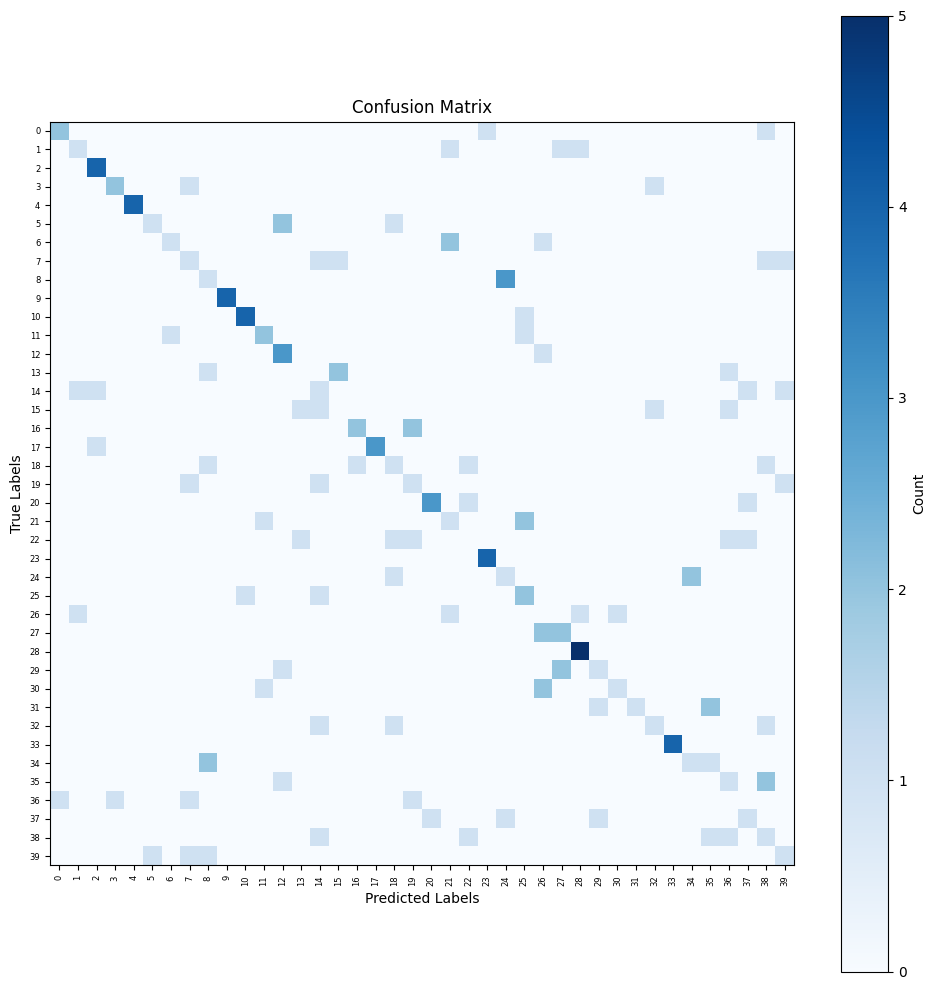

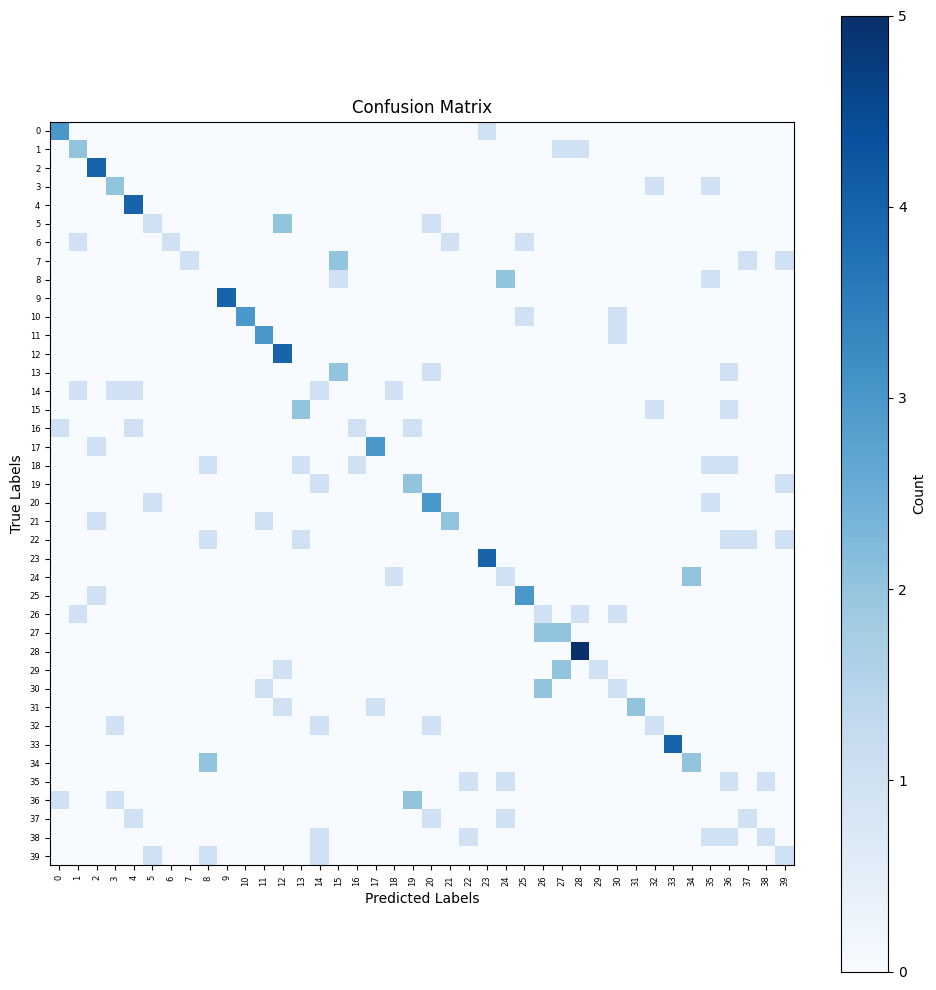

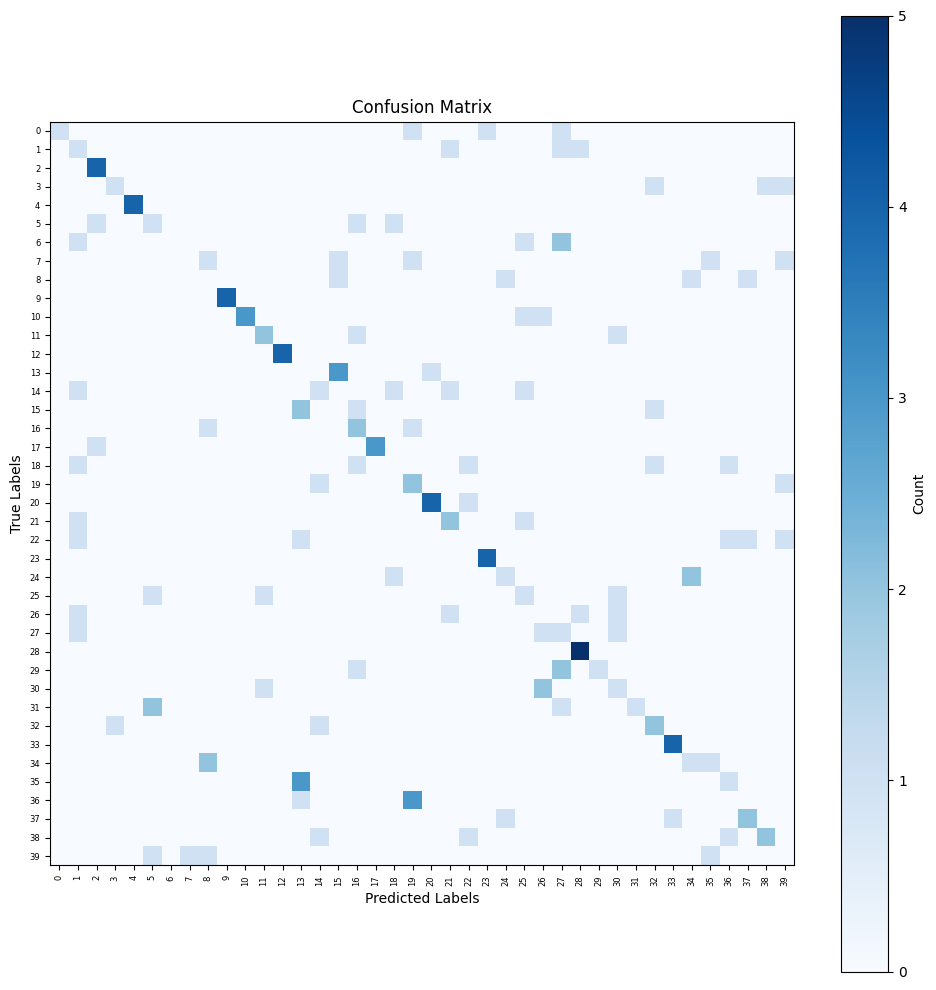

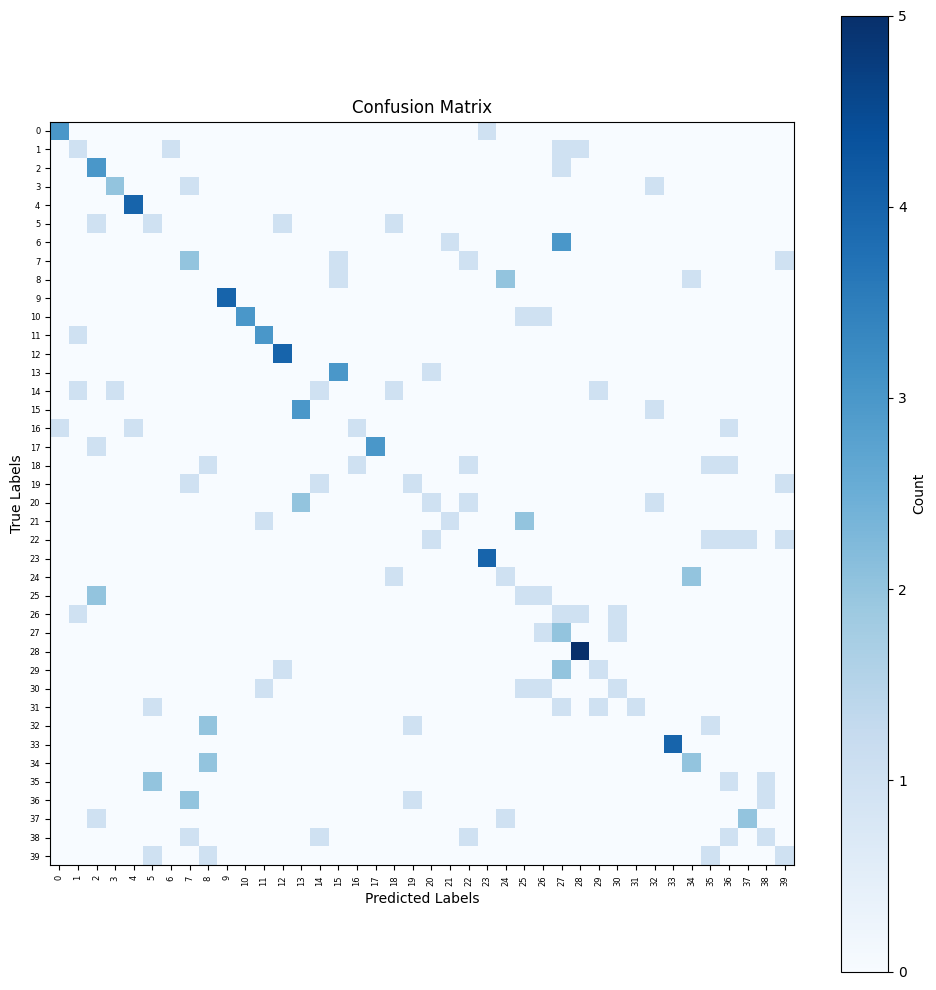

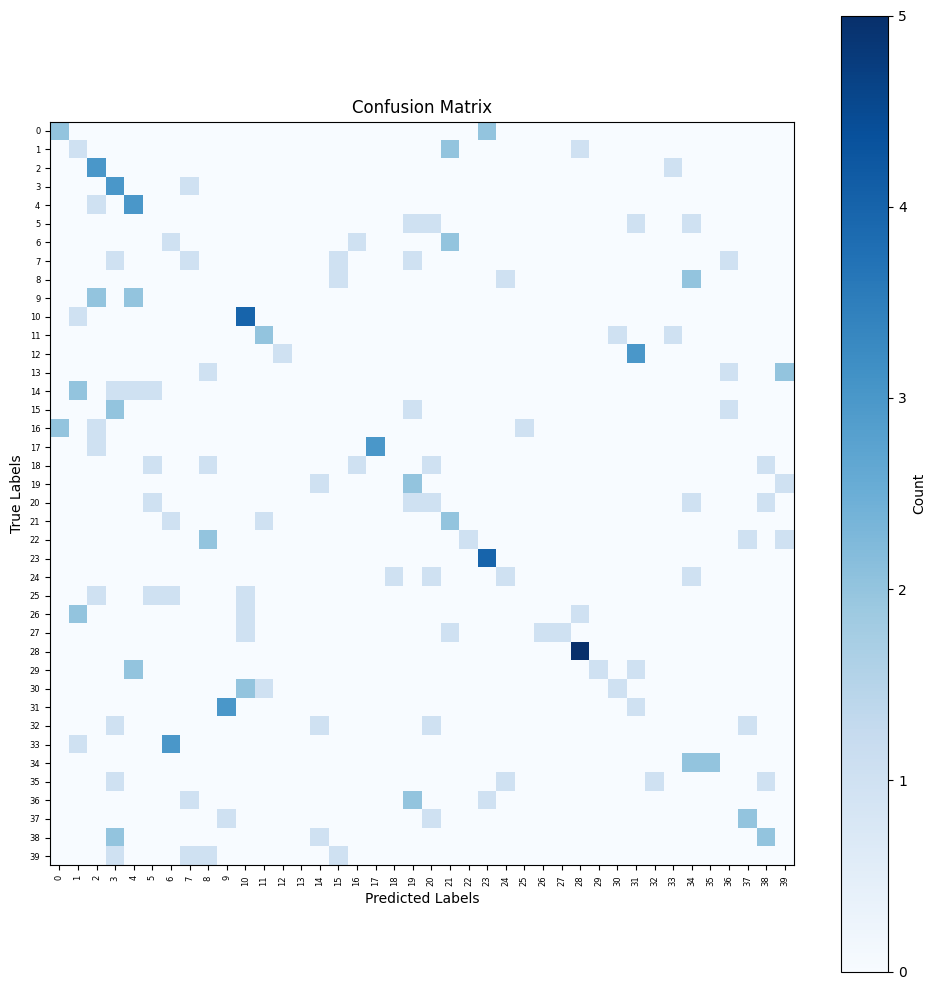

Learning rate set to 0.075436
0:	learn: 3.6308228	total: 186ms	remaining: 3m 6s
1:	learn: 3.5780818	total: 242ms	remaining: 2m
2:	learn: 3.5310811	total: 305ms	remaining: 1m 41s
3:	learn: 3.4871441	total: 357ms	remaining: 1m 28s
4:	learn: 3.4263543	total: 412ms	remaining: 1m 21s
5:	learn: 3.3776393	total: 459ms	remaining: 1m 16s
6:	learn: 3.3355898	total: 510ms	remaining: 1m 12s
7:	learn: 3.2910533	total: 562ms	remaining: 1m 9s
8:	learn: 3.2568827	total: 606ms	remaining: 1m 6s
9:	learn: 3.2170939	total: 660ms	remaining: 1m 5s
10:	learn: 3.1722396	total: 724ms	remaining: 1m 5s
11:	learn: 3.1295346	total: 785ms	remaining: 1m 4s
12:	learn: 3.0952019	total: 838ms	remaining: 1m 3s
13:	learn: 3.0611955	total: 894ms	remaining: 1m 2s
14:	learn: 3.0229543	total: 960ms	remaining: 1m 3s
15:	learn: 2.9847078	total: 1s	remaining: 1m 1s
16:	learn: 2.9588333	total: 1.05s	remaining: 1m
17:	learn: 2.9224434	total: 1.1s	remaining: 59.9s
18:	learn: 2.8907219	total: 1.15s	remaining: 59.2s
19:	learn: 2.855

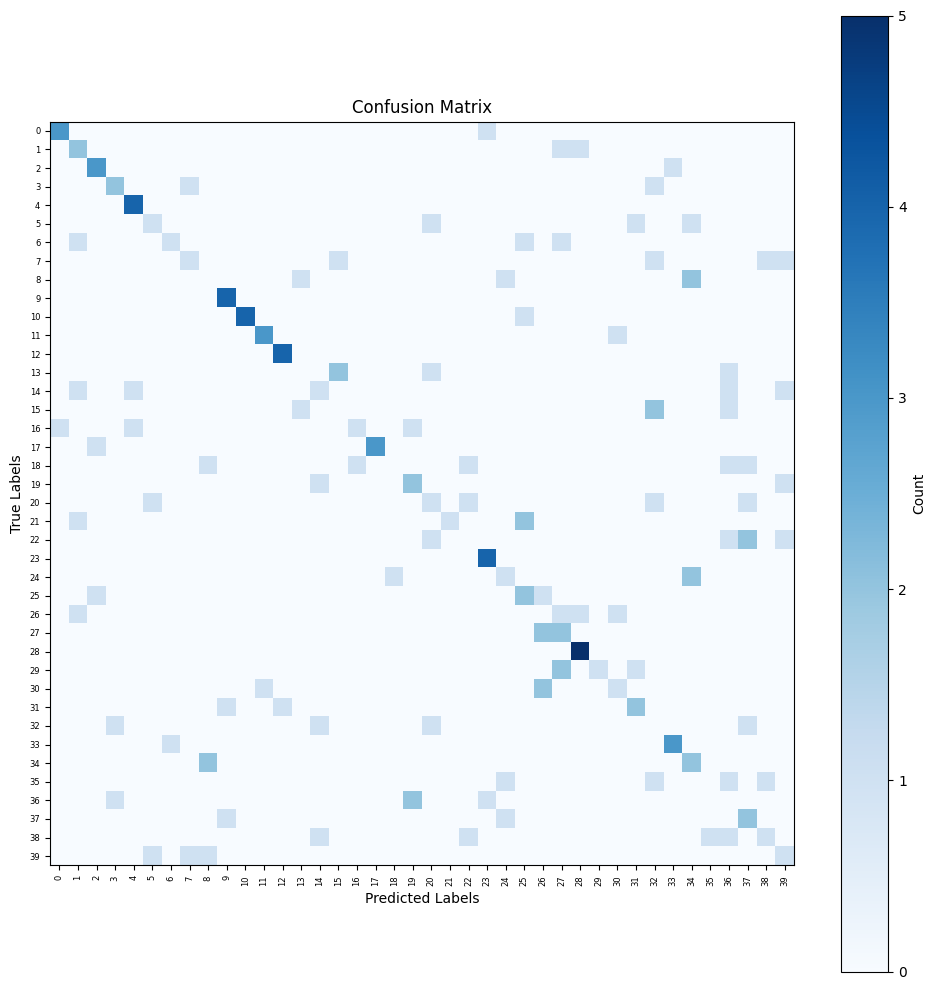

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.774037
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.774037
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [I

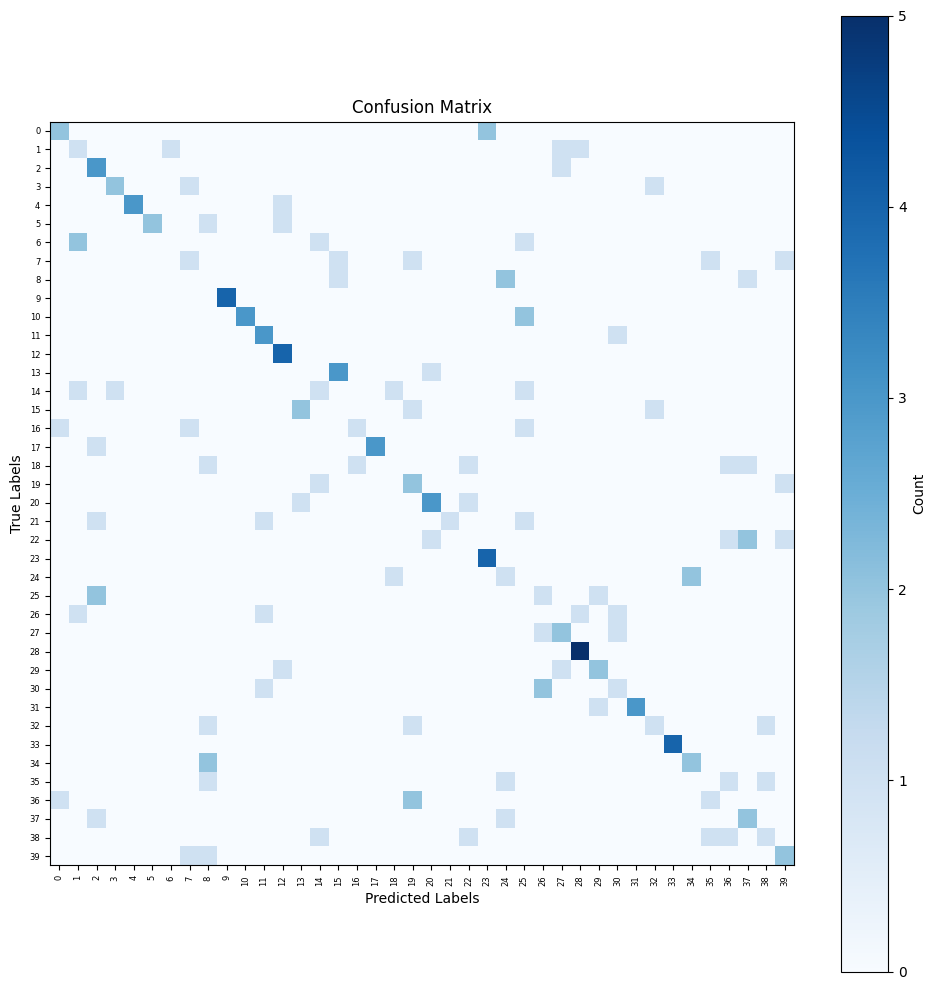

,Decision Tree,Random Forest,Gradient Boosting,HistGradientBoosting,KNN,CatBoost,LightGBM
Accuracy,0.404762,0.440476,0.386905,0.380952,0.297619,0.404762,0.410714
Precision,0.426573,0.475312,0.424391,0.400162,0.306666,0.410218,0.431349
Recall,0.404762,0.440476,0.386905,0.380952,0.297619,0.404762,0.410714
F1 Score,0.401224,0.424735,0.380280,0.372789,0.263336,0.386046,0.402382


In [8]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data